# PROYECTO SRPINT 5 

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Cargar todas las librerías 

import pandas as pd
import numpy as np
import math
import seaborn as sns 
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos 

In [3]:
# Carga los archivos de datos en diferentes DataFrames

df_users = pd.read_csv('megaline_users.csv')

df_calls = pd.read_csv('megaline_calls.csv')

df_internet = pd.read_csv('megaline_internet.csv')

df_messages = pd.read_csv('megaline_messages.csv')

df_plans = pd.read_csv('megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Es un dataset de varias columnas solo 2 entradas sin valores ausentes. Es de caracter informativo y nos podría servir para hacer los cálculos pertinentes para cada usuario. No se propone ningún cambio ya que no contiene duplicados, valores ausentes y la información está completa. Si se quiere homologar los megabytes (mb) habría que hacer el cambio también en otro dataset y por fines prácticos, se dejará 'mb_per_month_included' intacto. 

## Corregir datos

Se busca por duplicados y valores nulos

In [6]:
# Buscamos valores duplicados 

print('Hay:', df_plans.duplicated().sum(),' valores duplicados')

Hay: 0  valores duplicados


In [7]:
# Buscamos valores nulos

print('Valores nulos en el dataframe de llamadas:','\n',df_calls.isna().sum())

Valores nulos en el dataframe de llamadas: 
 id           0
user_id      0
call_date    0
duration     0
dtype: int64


## Enriquecer los datos

**NO SE SUGIERE ENRIQUECER**

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios

print(df_users.sample(10))

     user_id first_name  last_name  age  \
0       1000   Anamaria      Bauer   45   
158     1158      Robin   Thornton   20   
413     1413      Andre    Hensley   38   
405     1405     Shella     Hunter   34   
249     1249      Kelly    Goodman   41   
268     1268     Britni     Bowers   33   
33      1033    Latoyia      Moran   28   
128     1128     Lucius  Fernandez   41   
460     1460    Winford  Underwood   46   
353     1353    Emerson  Whitfield   56   

                                               city    reg_date      plan  \
0             Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
158  Virginia Beach-Norfolk-Newport News, VA-NC MSA  2018-11-30  ultimate   
413                             Bakersfield, CA MSA  2018-07-12      surf   
405            Indianapolis-Carmel-Anderson, IN MSA  2018-06-22  ultimate   
249                        Cincinnati, OH-KY-IN MSA  2018-05-14  ultimate   
268                                  Fresno, CA MSA  2018-01-13 

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Un dataset de varias columnas con información sobre los usuarios. Son 500 entradas, con datos enteros y objetos. La primera observación con los datos sería el formato de las fechas (se toman como objetos) que para fines útiles los convertiremos a tipo 'datetime'. También crearemos dos columnas para el dataset, una que muestre si el usuario sigue activo y otra columna que muestre estado donde se ubica(n) la(s) ciudad(es). Igualmente, buscaremos por valores duplicados. Se pueden arreglar estos cambios con las opciones to_datetime, .duplicated().sum(), .isna() y .str.split().

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
# Buscamos valores duplicados 

print('Hay:', df_users.duplicated().sum(),' valores duplicados')
print('Hay:', df_users['user_id'].duplicated().sum(),' user_id duplicados')

Hay: 0  valores duplicados
Hay: 0  user_id duplicados


In [11]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Mantenemos los valores nulos de la columna 'churn_date' ya que nos muestran los usuarios activos. En cambio, añadimos una columna que muestre valores booleanos acerca si el usuario sigue contratando el servicio o no. 

In [12]:
# Añadimos la columna 'active'

df_users['active'] = df_users['churn_date'].isna()

print(df_users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan  churn_date  active  
0 2018-12-24  ultimate         NaN    True  
1 2018-08-13      

Separamos los datos de 'city' ya que esta columna contiene la ciudad y el(los) estado(s) donde se ubica la ciudad. Podría ser de utilidad para separar diferentes ciudades presentes en un mismo(s) estado. 

In [13]:
# Añadimos la columna 'state' de la columna 'city'

df_users['state'] = df_users['city'].str.split(',',n=1).str[1] # Creamos la columna 'state' a partir de 'city' donde separamos por coma y str[1] indica el valor a almacena en la columna 'state'
df_users['state'] = df_users['state'].str.strip()              # Quitamos los espacios al inicio y final de cada elemento

print(df_users.sample(3))

     user_id first_name last_name  age                                 city  \
347     1347       Trey     Lynch   65  Charleston-North Charleston, SC MSA   
23      1023       Jack   Delaney   70      Omaha-Council Bluffs, NE-IA MSA   
316     1316    Lucilla     Weeks   59                        Tulsa, OK MSA   

      reg_date      plan churn_date  active      state  
347 2018-06-17  ultimate        NaN    True     SC MSA  
23  2018-07-06      surf        NaN    True  NE-IA MSA  
316 2018-05-21      surf        NaN    True     OK MSA  


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

print(df_calls.sample(10))

              id  user_id   call_date  duration
19447   1073_300     1073  2018-04-16      3.10
137127   1498_49     1498  2018-05-08     15.09
70766    1252_80     1252  2018-12-18     19.06
5195    1022_461     1022  2018-06-03     12.00
15890   1062_130     1062  2018-07-12      3.42
80028    1287_77     1287  2018-11-22      0.00
50517    1182_90     1182  2018-11-18      1.96
77839   1278_223     1278  2018-12-18      0.00
64541    1233_51     1233  2018-11-22      0.21
57410   1206_153     1206  2018-09-16      0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Un dataset de 4 columnas que describe cuánto duró la llamada de un usuario y la fecha en la que la realizó. Megaline redondea la duración. Aún cuando la llamada haya durado 1 segundo, esta cuenta como 1 minuto. Hay que corregir la duración de las llamadas para que muestre minutos enteros y lo podemos resolver con una función. También necesitamos cambiar el tipo de dato de la columna 'call_date' a datetime. Una vez hecho, se crea una nueva columna que muestre el mes en el que se realizó la llamada

### Corregir los datos

Buscamos valores duplicados y nulos. Redondeamos la duración de las llamadas a su siguiente número entero 

In [16]:
# Buscamos valores duplicados 

print('Hay:', df_calls.duplicated().sum(),' valores duplicados')
print('Hay:', df_calls['id'].duplicated().sum(),' id de llamada duplicados')

Hay: 0  valores duplicados
Hay: 0  id de llamada duplicados


In [17]:
# Buscamos valores nulos

print('Valores nulos en el dataframe de llamadas:','\n',df_calls.isna().sum())

Valores nulos en el dataframe de llamadas: 
 id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [18]:
# Creamos función que redondee al siguiente número 

def round_up(number):
    return math.ceil(number)                                # Redondea el número hacia arriba al entero más cercano

df_calls['duration'] = df_calls['duration'].apply(round_up) # Llamamos .apply() para aplicar la función a la columna 'duration'

print(df_calls.sample(5)) 

              id  user_id   call_date  duration
91165   1328_795     1328  2018-11-26         2
21637   1079_350     1079  2018-12-09        12
116081  1406_307     1406  2018-12-13         0
38555   1144_467     1144  2018-07-07         6
46204   1167_287     1167  2018-06-27         2


In [19]:
# Cambiamos la columna 'call_date' a datetime

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Creamos una columna que muestre el mes en el que se hizo la llamada

In [20]:
# Creamos la columna 'month' a partir de 'call_date' 

df_calls['month'] = df_calls['call_date'].dt.month # Utilizamos el atributo .dt.month

print(df_calls.sample(5))

              id  user_id  call_date  duration  month
84524    1312_16     1312 2018-07-07         0      7
114266  1400_616     1400 2018-05-24        21      5
71216    1253_62     1253 2018-11-26        13     11
12493   1054_219     1054 2018-11-10        13     11
12359    1054_81     1054 2018-09-28         0      9


## Mensajes

In [21]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Imprime una muestra de datos para los mensajes

print(df_messages.sample(10))

             id  user_id message_date
61548   1385_12     1385   2018-06-26
47917  1324_643     1324   2018-05-28
39894  1258_361     1258   2018-12-14
7867   1060_203     1060   2018-11-02
43087   1283_26     1283   2018-12-01
38422  1252_262     1252   2018-10-20
5010    1046_72     1046   2018-12-30
31187   1195_54     1195   2018-10-23
7624   1059_508     1059   2018-05-06
30256  1189_218     1189   2018-11-20


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Un dataframe sencillo de 3 columnas que muestra la fecha en la que un usuario envió un mensaje. La única corrección necesaria es cambiar el tipo de dato de la columna 'message_date' a datetime. Posterior a eso, creamos una nueva columna que muestre el mes en el que el usuario mandó el mensaje.

### Corregir los datos

Buscamos valores duplicados y nulos. Modificamos la fecha a datetime

In [23]:
# Buscamos valores duplicados 

print('Hay:', df_messages.duplicated().sum(),' valores duplicados')
print('Hay:', df_messages['id'].duplicated().sum(),' id de mensaje duplicados')

Hay: 0  valores duplicados
Hay: 0  id de mensaje duplicados


In [24]:
# Buscamos valores nulos

print('Valores nulos en el dataframe de mensajes:','\n',df_messages.isna().sum())

Valores nulos en el dataframe de mensajes: 
 id              0
user_id         0
message_date    0
dtype: int64


In [25]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Creamos una columna que muestre el mes en el que se hizo la llamada

In [26]:
# Creamos la columna 'month' a partir de 'message_date' 

df_messages['month'] = df_messages['message_date'].dt.month # Utilizamos el atributo .dt.month

print(df_messages.sample(5))

             id  user_id message_date  month
68466   1442_38     1442   2018-12-19     12
38639  1254_143     1254   2018-08-14      8
72684  1470_312     1470   2018-09-02      9
43565   1289_64     1289   2018-12-22     12
63972   1408_97     1408   2018-10-23     10


## Internet

In [27]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.sample(10))

             id  user_id session_date  mb_used
51215  1231_144     1231   2018-08-28   110.81
16266  1073_165     1073   2018-09-05   390.29
32830  1147_480     1147   2018-07-12   232.89
94167  1439_220     1439   2018-08-29   366.71
64160   1294_81     1294   2018-10-17   644.56
11751   1057_91     1057   2018-11-29   896.62
19088  1085_162     1085   2018-12-09   189.99
64316  1295_210     1295   2018-12-22   616.55
45609  1202_198     1202   2018-11-01   527.90
48088  1214_462     1214   2018-10-17   327.56


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Un dataset de que contiene 4 columnas acerca del uso de internet. El único cambio que se sugiere es cambiar el tipo de dato de la columna 'session_date' a datetime. 

### Corregir los datos

Buscamos valores duplicados y nulos. Modificamos la fecha a datetime

In [29]:
# Buscamos valores duplicados 

print('Hay:', df_internet.duplicated().sum(),' valores duplicados')
print('Hay:', df_internet['id'].duplicated().sum(),' id de mensaje duplicados')

Hay: 0  valores duplicados
Hay: 0  id de mensaje duplicados


In [30]:
# Buscamos valores nulos

print('Valores nulos en el dataframe de internet:','\n',df_internet.isna().sum())

Valores nulos en el dataframe de internet: 
 id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [31]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Creamos una columna que muestre el mes en el que se hizo la llamada

In [32]:
# Creamos la columna 'month' a partir de 'session_date' 

df_internet['month'] = df_internet['session_date'].dt.month # Utilizamos el atributo .dt.month

print(df_internet.sample(5))

              id  user_id session_date  mb_used  month
77842    1363_23     1363   2018-11-19   509.33     11
91299   1420_192     1420   2018-11-10     0.00     11
30911   1141_253     1141   2018-08-15   512.91      8
103390  1494_272     1494   2018-10-12   274.49     10
11660     1057_0     1057   2018-11-03   785.25     11


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [33]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

Utilizando .groupby() vamos a separar cada dataframe con la información que nos interesa. Después, haciendo uso de .merge() se creará un nuevo dataframe que de detalles de los minutos, mensajes y megabytes utilizados por user_id por cada mes. 

In [34]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

user_calls_per_month = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index() # Agrupando por 'user_id' y 'month' contamos cuántas llamdas hizo el usuario en el mes

print(user_calls_per_month)

      user_id  month  id
0        1000     12  16
1        1001      8  27
2        1001      9  49
3        1001     10  65
4        1001     11  64
...       ...    ...  ..
2253     1498     12  39
2254     1499      9  41
2255     1499     10  53
2256     1499     11  45
2257     1499     12  65

[2258 rows x 3 columns]


In [35]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

user_min_per_month = df_calls.groupby(['user_id','month'])['duration'].sum().reset_index() # Agrupando por 'user_id' y 'month' sumamos la duración los minutos utilizados por el usuario. Reiniciamos el índice para un mejor despliegue de datos

print(user_min_per_month)

      user_id  month  duration
0        1000     12       124
1        1001      8       182
2        1001      9       315
3        1001     10       393
4        1001     11       426
...       ...    ...       ...
2253     1498     12       339
2254     1499      9       346
2255     1499     10       385
2256     1499     11       308
2257     1499     12       496

[2258 rows x 3 columns]


In [36]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

user_messages_per_month = df_messages.groupby(['user_id','month'])['id'].count().reset_index() # Agrupando por 'user_id' y 'month' contamos cuántos mensajes utilizó el usuario. Reiniciamos el índice para un mejor despliegue de datos. El conteo de mensajes sale en el dataframe como 'id'

print(user_messages_per_month)

      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


In [37]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

user_mb_per_month = df_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index() # Agrupando por 'user_id' y 'month' sumamos los megabytes utilizados por el usuario. Reiniciamos el índice para un mejor despliegue de datos

print(user_mb_per_month)

      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

Utilizamos .merge() para unir los dataframes de arriba en uno solo. Tomará varios usos de .merge()

In [38]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_merged = user_min_per_month.merge(user_messages_per_month, on = ['user_id','month'], how = 'outer') # Fusionamos minutos con mensajes utilizando 'outer' para incluir valores que no estén presentes en algún df

df_merged = df_merged.merge(user_mb_per_month, on = ['user_id', 'month'], how = 'outer')               # Fusionamos el df creado con el internet utilizando 'outer' para incluir valores que no estén en algún df

df_merged.columns = ['user_id', 'month', 'minutes_used', 'sms_used', 'mb_used']                        # Damos formato a los encabezados

print(df_merged)

      user_id  month  minutes_used  sms_used   mb_used
0        1000     12         124.0      11.0   1901.47
1        1001      8         182.0      30.0   6919.15
2        1001      9         315.0      44.0  13314.82
3        1001     10         393.0      53.0  22330.49
4        1001     11         426.0      36.0  18504.30
...       ...    ...           ...       ...       ...
2288     1498     12         339.0       NaN  23137.69
2289     1499      9         346.0       NaN  12984.76
2290     1499     10         385.0       NaN  19492.43
2291     1499     11         308.0       NaN  16813.83
2292     1499     12         496.0       NaN  22059.21

[2293 rows x 5 columns]


In [39]:
# Añade la información de la tarifa

user_plans = df_users[['user_id','plan']]                             # Sacamos información sobre las tarifas

df_merged = df_merged.merge(user_plans, on = 'user_id', how = 'left') # lo anexamos a nuestro dataframe existente utilizando 'left' para que se junte con base en df_merged

print(df_merged)

      user_id  month  minutes_used  sms_used   mb_used      plan
0        1000     12         124.0      11.0   1901.47  ultimate
1        1001      8         182.0      30.0   6919.15      surf
2        1001      9         315.0      44.0  13314.82      surf
3        1001     10         393.0      53.0  22330.49      surf
4        1001     11         426.0      36.0  18504.30      surf
...       ...    ...           ...       ...       ...       ...
2288     1498     12         339.0       NaN  23137.69      surf
2289     1499      9         346.0       NaN  12984.76      surf
2290     1499     10         385.0       NaN  19492.43      surf
2291     1499     11         308.0       NaN  16813.83      surf
2292     1499     12         496.0       NaN  22059.21      surf

[2293 rows x 6 columns]


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

Se calculan los ingresos mensuales para cada renglón de df_merged. Se puede abordar utilizando un diccionario anidado que contenga la información de df_plans y una función. 

In [40]:
# Calcula el ingreso mensual para cada usuario

# Creamos un diccionario anidado con el que podamos trabajar para definir los costos de usuario por mes. Contiene la información de df_plans
plans = {
'ultimate': {'cost':70, 'minute_limit':3000, 'sms_limit':1000, 'mb_limit':30720, 'extra_min':0.01, 'extra_sms':0.01, 'extra_mb':7},
'surf': {'cost':20, 'minute_limit':500, 'sms_limit':50, 'mb_limit': 15360, 'extra_min':0.03, 'extra_sms':0.03, 'extra_mb':10}
}

def monthly_cost(item):                                           # Creamos una función que evalue el costo mensual por usuario
    
    ex_min_cost = 0                                               # Partimos de que las variables de costo extra son 0
    ex_sms_cost = 0
    ex_mb_cost_t = 0
    
    plan = plans[item['plan']]                                    # Determina el plan a seguir con base en 'item['plan']' que sería cada renglón de nuestro df_merged para la columna 'plan'
    
    extra_min_used = plan['minute_limit'] - item['minutes_used']  # Fórmula para conocer los minutos extra del usuario en el mes
    extra_sms_used = plan['sms_limit'] - item['sms_used']         # Fórmula para conocer los mensajes extra del usuario en el mes
    extra_mb_used = plan['mb_limit'] - item['mb_used']            # Fórmula para conocer los megabytes extra del usuario en el mes

    if extra_min_used < 0:                                        # Por la fórmula anterior, si los minutos extra son menor a 0:
        ex_min_abs = abs(extra_min_used)                          # Se saca el positivo de la diferencia (valor absoluto)
        ex_min_cost = ex_min_abs * plan['extra_min']              # Se obtiene el costo extra por minuto
    
    if extra_sms_used < 0:                                        # Por la fórmula anterior, si los mensajes extra son menor a 0:
        ex_sms_abs = abs(extra_sms_used)                          # se saca el positivo de la diferencia (valor absoluto) 
        ex_sms_cost = ex_sms_abs * plan['extra_sms']              # Se obtiene el costo extra por mensaje
    
    if extra_mb_used < 0:                                         # Por la fórmula anterior, si los megabytes extra son menor a 0:
        ex_mb_abs = abs(extra_mb_used)                            # Se saca el positivo de la diferencia (valor absoluto)
        ex_mb_cost = ex_mb_abs/1024                               # Dividimos entre 1024 para conocer los gigabytes extra utilizados
        ex_mb_cost_up = math.ceil(ex_mb_cost)                     # Megaline redondea los megabytes hacia arriba (Ej. 6.15 gb = 7 gb)
        ex_mb_cost_t = ex_mb_cost_up * plan['extra_mb']           # Se obtiene el costo extra por gigabyte

    extra_cost = ex_min_cost + ex_sms_cost + ex_mb_cost_t         # Sumamos los rubros de costos extra
    total_cost = plan["cost"] + extra_cost                        # Obtenemos el costo total = costo fijo + costo extra
    return total_cost

df_merged['monthly_cost'] = df_merged.apply(monthly_cost, axis=1) # Añadimos la columna 'monthly cost' que aplica la función y despliega el costo mensual

print(df_merged.sample(5))

      user_id  month  minutes_used  sms_used   mb_used      plan  monthly_cost
703      1147      9         564.0      18.0  35929.97      surf        231.92
2189     1475     11         350.0      77.0  18927.32  ultimate         70.00
171      1043      9         200.0     101.0  32619.76  ultimate         84.00
139      1039      7         460.0      30.0  20939.15  ultimate         70.00
711      1149     11         598.0       NaN  12987.49      surf         22.94


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del  estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

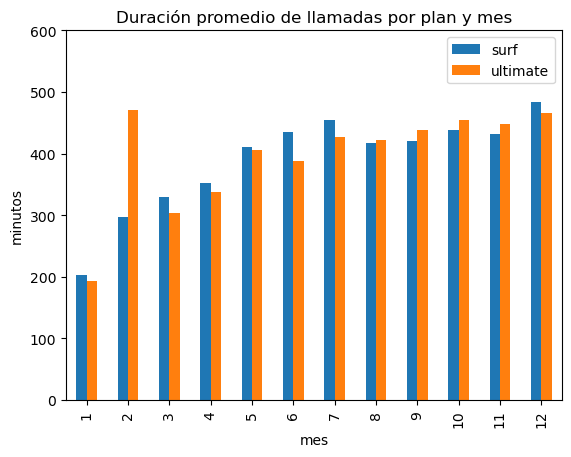

In [41]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

mean_call_per_month = df_merged.groupby(['month','plan'])['minutes_used'].mean().reset_index() # Agrupando por mes y plan obtenemos el promedio de los minutos usados. Reiniciamos el índice

# Creamos pivot table para centrarnos en la información que nos interesa
pivot_mean_call = mean_call_per_month.pivot_table(index = 'month',                             # Usamos el mes como índice
                                                  columns = 'plan',                            # Las columnas serán los planes (surf y ultimate)
                                                  values = 'minutes_used')                     # Los valores de la tabla será el promedio de minutos del mes

pivot_mean_call.plot(kind = 'bar',                                                             # Creamos un gráfico de barras
                     title = 'Duración promedio de llamadas por plan y mes',
                     ylabel = 'minutos',
                     xlabel = 'mes', 
                     ylim = [0,600])

plt.legend(['surf','ultimate'])

plt.show()

El promedio de minutos parece ser similar entre planes por varios meses. No se observan diferencias significativas fuera del mes 2, donde el promedio de 'Ultimate' es mucho mayor al de 'Surf. Falta la confirmación de hipótesis.

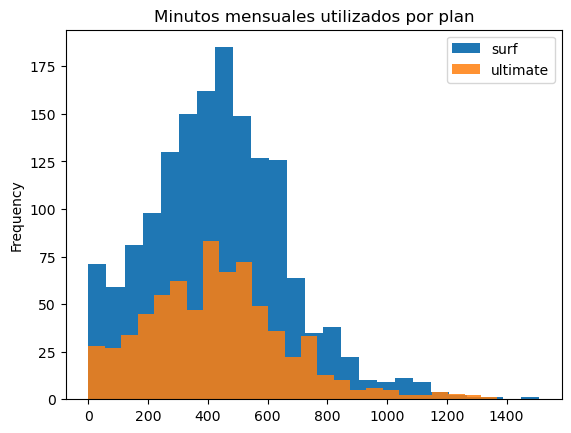

In [42]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

min_per_month = df_merged[['month','minutes_used','plan']]                              # Obtenemos un df que solo tenga información sobre el plan, mes y minutos usados en llamada

surf_min_per_month = min_per_month[min_per_month['plan'] == 'surf']                     # Creamos variable que guarde solo los valores del plan 'surf'
ultimate_min_per_month = min_per_month[min_per_month['plan'] == 'ultimate']             # Creamos variable que guarde solo los valores del plan 'ultimate'

surf_min_per_month['minutes_used'].plot(kind = 'hist',                                  # Creamos el histograma
                                        bins = 25, 
                                        title = 'Minutos mensuales utilizados por plan',
                                        xlabel = 'minutos',
                                        ylabel = 'Frecuencia')
ultimate_min_per_month['minutes_used'].plot(kind = 'hist',
                                            bins = 25, 
                                            alpha = 0.85)

plt.legend(['surf','ultimate'])
plt.show()

Hay una mayor frecuencia de los usuarios de 'Surf' que de 'Ultimate', se asume que esto se debe a la cantidad de usuarios del plan. A simple vista, podemos ver que los datos están sesgados a la derecha, siendo el pico de cada histograma entre los 400-500 minutos. Tenemos otros contenedores (valores adicionales) localizadas al extremo derecho del gráfico, lo que podría suponer valores atípicos. 

[Calcula la media y la varianza de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [43]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_surf_min_per_month = surf_min_per_month['minutes_used'].mean()         # Obtenemos el promedio de minutos de usuarios 'Surf'
var_surf_min_per_month = np.var(surf_min_per_month['minutes_used'])         # Obtenemos la varianza de los datos de usuarios 'Surf'

mean_ultimate_min_per_month = ultimate_min_per_month['minutes_used'].mean() # Obtenemos el promedio de minutos de usuarios 'Ultimate'
var_ultimate_min_per_month = np.var(ultimate_min_per_month['minutes_used']) # Obtenemos la varianza de los datos de usuarios 'Ultimate'

print(f'La media de llamadas para usuarios "Surf" es: {mean_surf_min_per_month:.3f} minutos')
print(f'La varianza de llamadas para usuarios "Surf" es: {var_surf_min_per_month:.3f} minutos')
print()
print(f'La media de llamadas para usuarios "Ultimate" es: {mean_ultimate_min_per_month:.3f} minutos')
print(f'La varianza de llamadas para usuarios "Ultimate" es: {var_ultimate_min_per_month:.3f} minutos')

La media de llamadas para usuarios "Surf" es: 436.520 minutos
La varianza de llamadas para usuarios "Surf" es: 52537.037 minutos

La media de llamadas para usuarios "Ultimate" es: 434.676 minutos
La varianza de llamadas para usuarios "Ultimate" es: 56494.286 minutos


Text(0, 0.5, 'Minutos')

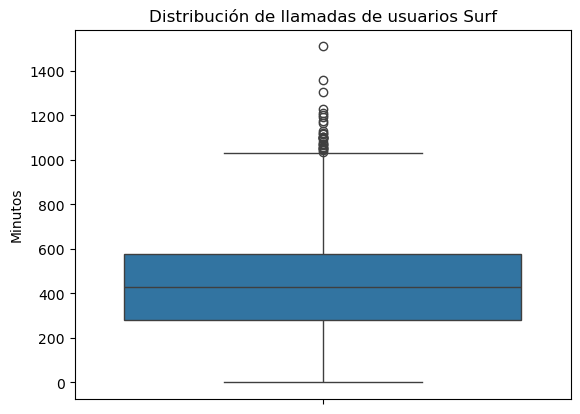

In [44]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(surf_min_per_month['minutes_used'])
plt.title('Distribución de llamadas de usuarios Surf')
plt.ylabel('Minutos')

Text(0, 0.5, 'Minutos')

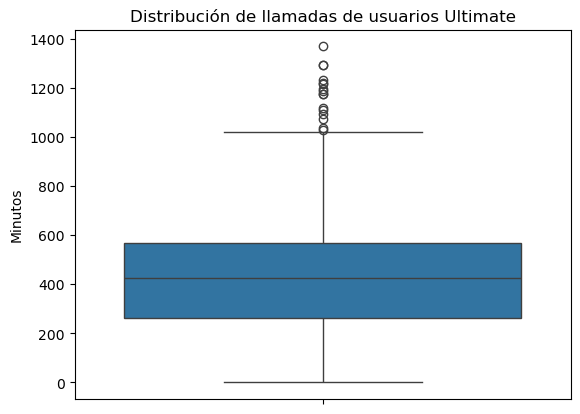

In [45]:
# Diagrama de caja para distribución de usuarios Ultimate

sns.boxplot(ultimate_min_per_month['minutes_used'])
plt.title('Distribución de llamadas de usuarios Ultimate')
plt.ylabel('Minutos')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Ambas distribuciones tienen medias similares (Surf = 463.52 minutos, Ultimate = 434.676 minutos) y varianzas muy altas (Surf = 52537.04, Ultimate = 56494.28). De igual manera, ambos tienen varios valores atípicos y sus valores máximos están por encima de los 1000 minutos. 

A falta de probar la hipótesis para corroborar si hay diferencia entre los planes, se puede inferir que el comportamiento no varia en función del plan contratado.

### Mensajes

In [46]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

sms_per_month = df_merged[['month','sms_used','plan']]      # Obtenemos un df que solo tenga información sobre el plan, mes y mensajes usados de ambos planes

sms_per_month.dropna(subset = ['sms_used'], inplace = True) # Eliminamos valores nulos ya que se adaptaron a df_merged por incluir 'outer' como parámetro

print(sms_per_month)

      month  sms_used      plan
0        12      11.0  ultimate
1         8      30.0      surf
2         9      44.0      surf
3        10      53.0      surf
4        11      36.0      surf
...     ...       ...       ...
2273      9      21.0      surf
2274     10      18.0      surf
2275     11      13.0      surf
2276     12      11.0      surf
2277     12      50.0  ultimate

[1806 rows x 3 columns]


C:\Users\Carlo\AppData\Local\Temp\ipykernel_25700\3771050342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_per_month.dropna(subset = ['sms_used'], inplace = True) # Eliminamos valores nulos ya que se adaptaron a df_merged por incluir 'outer' como parámetro


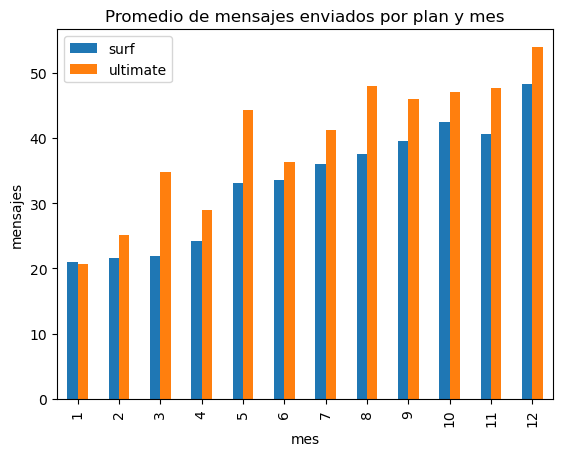

In [47]:
# Creamos gráfico de barras comparando el promedio de mensajes totales al mes de usuarios entre planes

pivot_sms_per_month = sms_per_month.pivot_table(index = 'month',                   # Usamos el mes como índice
                                                columns = 'plan',                  # Las columnas serán los planes (surf y ultimate)
                                                values = 'sms_used',               # Los valores de la tabla será la suma de mensajes del mes
                                                aggfunc = 'mean')                  # Nos interesa el promedio de mensajes que tienden a enviar los usuarios de cada plan    

pivot_sms_per_month.plot(kind = 'bar',                                             # Creamos un gráfico de barras
                         title = 'Promedio de mensajes enviados por plan y mes', 
                         ylabel = 'mensajes', 
                         xlabel = 'mes')

plt.legend(['surf','ultimate'])

plt.show()

Al haber más usuarios de 'Surf' que de 'Ultimate' se consideró ideal comparar los promedio en lugar de la suma de mensajes. Podemos observar que prácticamente para casi todos los meses, los usuarios de 'Ultimate' envian más mensajes que los de 'Surf'. Un dato interesante es la diferencia de los mensajes incluidos entre planes es considerable, siendo 'Surf' de 50 mensajes mensuales y de 'Ultimate' de 1000 mensajes. No obstante, el promedio mensual de 'Ultimate' está lejos de el límite de mensajes mensuales. Habría que comparar promedios y varianzas para probar nuestra hipótesis

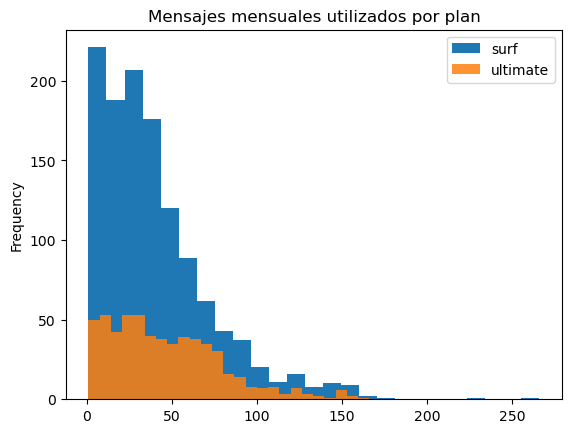

In [48]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_sms_per_month = sms_per_month[sms_per_month['plan'] == 'surf']                     # Creamos variable que guarde solo los valores del plan 'surf'
ultimate_sms_per_month = sms_per_month[sms_per_month['plan'] == 'ultimate']             # Creamos variable que guarde solo los valores del plan 'ultimate'

surf_sms_per_month['sms_used'].plot(kind = 'hist',                                  # Creamos el histograma
                                        bins = 25, 
                                        title = 'Mensajes mensuales utilizados por plan',
                                        xlabel = 'minutos',
                                        ylabel = 'Frecuencia')
ultimate_sms_per_month['sms_used'].plot(kind = 'hist',
                                            bins = 25, 
                                            alpha = 0.85)

plt.legend(['surf','ultimate'])
plt.show()

La frecuencia de 'Surf' es mucho mayor que de 'Ultimate', nuevamente esto se atribuye a la cantidad de usuarios del plan. Podemos ver un sesgo a la derecha, siendo el pico de 'Surf' alrededor de 0-10 y de 'Ultimate' de 20-30. Se observan unos pequeños contenedores localizados al extremo derecho del gráfico lo que podría suponer valores atípicos. 

In [49]:
# Calculamos la media y varianza de los mensajes enviados al mes 


mean_surf_sms_per_month = surf_sms_per_month['sms_used'].mean()         # Obtenemos el promedio de mensajes de usuarios 'Surf'
var_surf_sms_per_month = np.var(surf_sms_per_month['sms_used'])         # Obtenemos la varianza de los datos de usuarios 'Surf'

mean_ultimate_sms_per_month = ultimate_sms_per_month['sms_used'].mean() # Obtenemos el promedio de mensajes de usuarios 'Ultimate'
var_ultimate_sms_per_month = np.var(ultimate_sms_per_month['sms_used']) # Obtenemos la varianza de los datos de usuarios 'Ultimate'

print(f'La media de mensajes para usuarios "Surf" es: {mean_surf_sms_per_month:.3f}')
print(f'La varianza de mensajes para usuarios "Surf" es: {var_surf_sms_per_month:.3f}')
print()
print(f'La media de mensajes para usuarios "Ultimate" es: {mean_ultimate_sms_per_month:.3f}')
print(f'La varianza de mensajes para usuarios "Ultimate" es: {var_ultimate_sms_per_month:.3f}')

La media de mensajes para usuarios "Surf" es: 40.110
La varianza de mensajes para usuarios "Surf" es: 1090.451

La media de mensajes para usuarios "Ultimate" es: 46.296
La varianza de mensajes para usuarios "Ultimate" es: 1083.325


Text(0, 0.5, 'Mensajes')

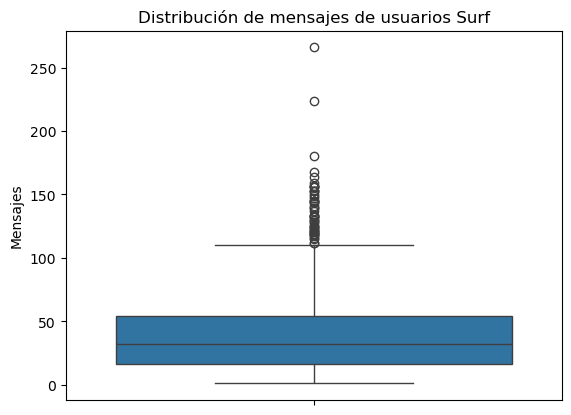

In [50]:
# Traza un diagrama de caja para visualizar la distribución mensual de mensajes

sns.boxplot(surf_sms_per_month['sms_used'])
plt.title('Distribución de mensajes de usuarios Surf')
plt.ylabel('Mensajes')

Text(0, 0.5, 'Mensajes')

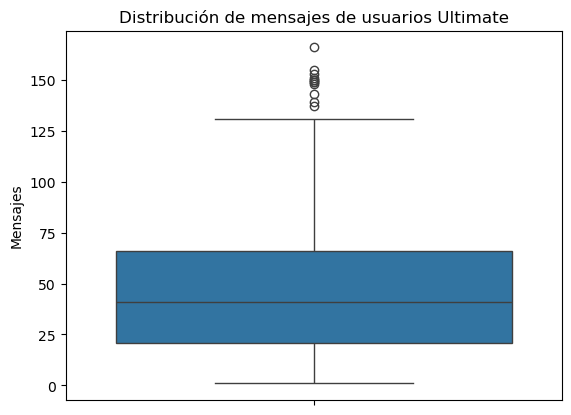

In [51]:
sns.boxplot(ultimate_sms_per_month['sms_used'])
plt.title('Distribución de mensajes de usuarios Ultimate')
plt.ylabel('Mensajes')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Ambas distribuciones tienen medias similares (Surf = 40.11 sms, Ultimate = 46.29 sms) y varianzas muy altas (Surf = 1090.45, Ultimate = 1083.32). 'Surf' tiene muchos más valores atípicos que 'Ultimate' picos y sus valores máximos están por encima de los 100 mensajes.

A falta de probar la hipótesis para corroborar si hay diferencia entre los planes, se puede inferir que el comportamiento podría ser semejante comparando ambos planes.

### Internet

In [52]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

mb_per_month = df_merged[['month', 'plan', 'mb_used']]     # Obtenemos un df que solo tenga información sobre el plan, mes y megabytes usados de ambos planes

mb_per_month.dropna(subset = ['mb_used'], inplace = True) # Eliminamos valores nulos ya que se adaptaron a df_merged por incluir 'outer' como parámetro

print(mb_per_month)

      month      plan   mb_used
0        12  ultimate   1901.47
1         8      surf   6919.15
2         9      surf  13314.82
3        10      surf  22330.49
4        11      surf  18504.30
...     ...       ...       ...
2288     12      surf  23137.69
2289      9      surf  12984.76
2290     10      surf  19492.43
2291     11      surf  16813.83
2292     12      surf  22059.21

[2277 rows x 3 columns]


C:\Users\Carlo\AppData\Local\Temp\ipykernel_25700\4016685371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_per_month.dropna(subset = ['mb_used'], inplace = True) # Eliminamos valores nulos ya que se adaptaron a df_merged por incluir 'outer' como parámetro


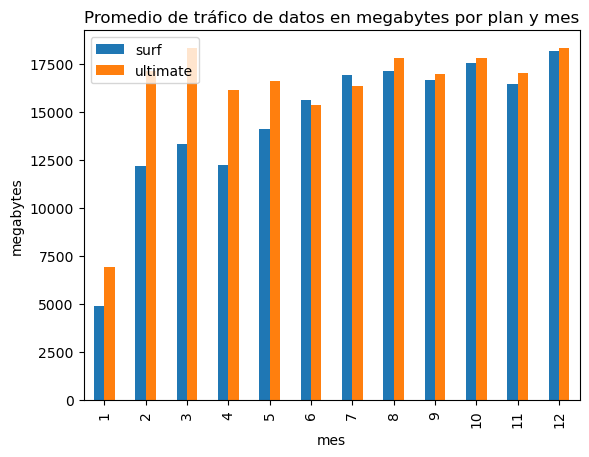

In [53]:
# Creamos gráfico de barras comparando el tráfico de datos al mes de usuarios entre planes

pivot_mb_per_month = mb_per_month.pivot_table(index = 'month',                  # Usamos el mes como índice
                                              columns = 'plan',                 # Las columnas serán los planes (surf y ultimate)
                                              values = 'mb_used',               # Los valores de la tabla será la suma de mensajes del mes
                                              aggfunc = 'mean')                 # Nos interesa el promedio de megabytes que tienden a utilizar los usuarios de cada plan    

pivot_mb_per_month.plot(kind = 'bar',                                           # Creamos un gráfico de barras
                         title = 'Promedio de tráfico de datos en megabytes por plan y mes', 
                         ylabel = 'megabytes', 
                         xlabel = 'mes')

plt.legend(['surf','ultimate'])

plt.show()

Al haber más usuarios de 'Surf' que de 'Ultimate' se consideró ideal comparar los promedio en lugar de considerar el tráfico total de megabytes (mb) por plan. Durante los primeros 5 meses, el promedio de mb los usuarios de 'Ultimate'es mayor al de 'Surf' y luego tiende a ser similar en los meses posteriores. Se infiere que esta diferencia se puede dar ya que solo trabajamos con una muestra significativa de usuarios y no con toda la cartera de Megaline. 

Un dato interesante es la diferencia de los mb incluidos entre planes es el doble, siendo 'Surf' de 15 gigabytes (15360 mb) mensuales y de 'Ultimate' de 30 gigabytes (30720 mb). No obstante, los promedios son similares en los meses posteriores a medio año. Habría que comparar promedios y varianzas para probar nuestra hipótesis

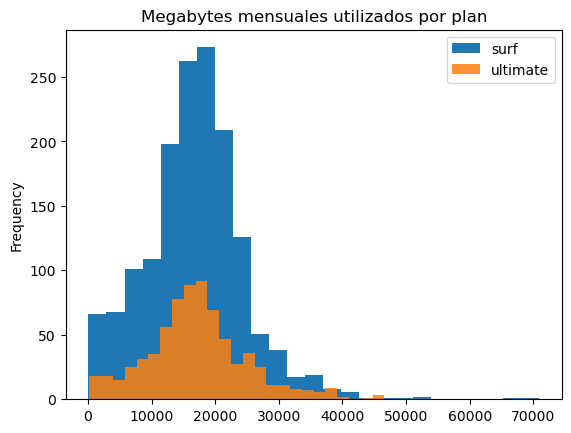

In [54]:
# Compara el número de megabytes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_mb_per_month = mb_per_month[mb_per_month['plan'] == 'surf']                     # Creamos variable que guarde solo los valores del plan 'surf'
ultimate_mb_per_month = mb_per_month[mb_per_month['plan'] == 'ultimate']             # Creamos variable que guarde solo los valores del plan 'ultimate'

surf_mb_per_month['mb_used'].plot(kind = 'hist',                                     # Creamos el histograma
                                  bins = 25, 
                                  title = 'Megabytes mensuales utilizados por plan',
                                  xlabel = 'megabytes',
                                  ylabel = 'Frecuencia')
ultimate_mb_per_month['mb_used'].plot(kind = 'hist',
                                            bins = 25, 
                                            alpha = 0.85)

plt.legend(['surf','ultimate'])
plt.show()

La frecuencia de 'Surf' es mucho mayor que de 'Ultimate', nuevamente esto se atribuye a la cantidad de usuarios del plan. 

A pesar de que se podría considerar una función normal por la típica forma de campana, tenemos varios datos posicionados a la derecha después del valor máximo y hay varios contenedores sesgados a la derecha que pudieran ser valores atípicos. 

In [55]:
# Calculamos la media y varianza de los megabytes usados 

mean_surf_mb_per_month = surf_mb_per_month['mb_used'].mean()         # Obtenemos el promedio de megabytes de usuarios 'Surf'
var_surf_mb_per_month = np.var(surf_mb_per_month['mb_used'])         # Obtenemos la varianza de los datos de usuarios 'Surf'

mean_ultimate_mb_per_month = ultimate_mb_per_month['mb_used'].mean() # Obtenemos el promedio de minutos de usuarios 'Ultimate'
var_ultimate_mb_per_month = np.var(ultimate_mb_per_month['mb_used']) # Obtenemos la varianza de los datos de usuarios 'Ultimate'

print(f'La media de megabytes para usuarios "Surf" es: {mean_surf_mb_per_month:.3f}')
print(f'La varianza de megabytes para usuarios "Surf" es: {var_surf_mb_per_month:.3f}')
print()
print(f'La media de megabytes para usuarios "Ultimate" es: {mean_ultimate_mb_per_month:.3f}')
print(f'La varianza de megabytes para usuarios "Ultimate" es: {var_ultimate_mb_per_month:.3f}')

La media de megabytes para usuarios "Surf" es: 16717.702
La varianza de megabytes para usuarios "Surf" es: 62128323.163

La media de megabytes para usuarios "Ultimate" es: 17238.642
La varianza de megabytes para usuarios "Ultimate" es: 61239556.120


Text(0, 0.5, 'Megabytes')

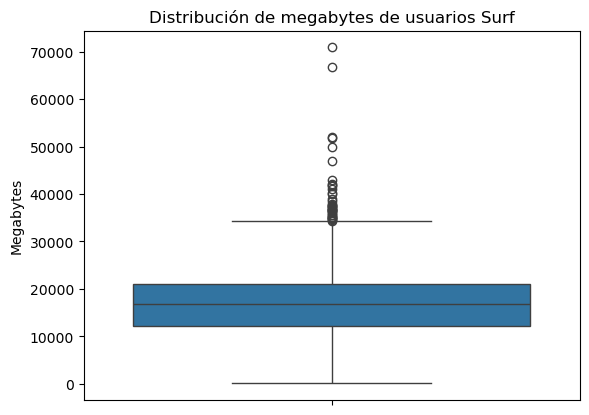

In [56]:
# Traza un diagrama de caja para visualizar la distribución mensual de megabytes

sns.boxplot(surf_mb_per_month['mb_used'])
plt.title('Distribución de megabytes de usuarios Surf')
plt.ylabel('Megabytes')

Text(0, 0.5, 'Megabytes')

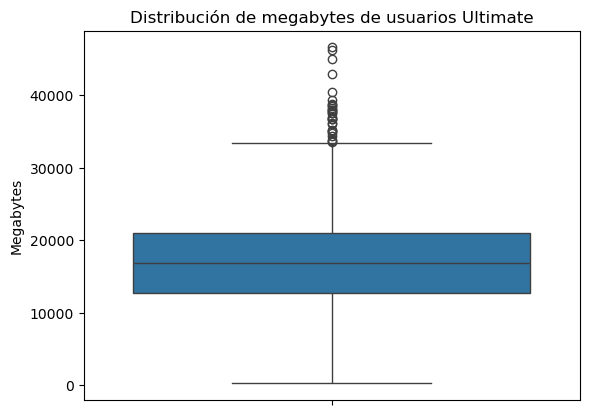

In [57]:
# Traza un diagrama de caja para visualizar la distribución mensual de mensajes

sns.boxplot(ultimate_mb_per_month['mb_used'])
plt.title('Distribución de megabytes de usuarios Ultimate')
plt.ylabel('Megabytes')

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Nuevamente, ambas distribuciones tienen medias similares (Surf = 16717.702 mb, Ultimate = 17238.64) y varianzas bastante elevadas (Surf = 62128323.163, Ultimate = 61239556.12). Los valores atípicos de 'Surf' están más alejados del máximo que de 'Ultimate'. La media de 'Surf' sobrepasa el límite establecido en el plan, por lo que podemos ver una tendencia de que los usuarios prefieren pagar un extra con tal de tener más megabytes al mes. 

A falta de probar la hipótesis para corroborar si hay diferencia entre los planes, se puede inferir que el comportamiento podría ser semejante entre planes. 

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [58]:
# Compara el gasto mensual de los usuarios por plan

income_per_month = df_merged[['month', 'plan', 'monthly_cost']]     # Obtenemos un df que solo tenga información sobre el plan, mes y costo mensual de ambos planes

print(income_per_month)

      month      plan  monthly_cost
0        12  ultimate         70.00
1         8      surf         20.00
2         9      surf         20.00
3        10      surf         90.09
4        11      surf         60.00
...     ...       ...           ...
2288     12      surf        100.00
2289      9      surf         20.00
2290     10      surf         70.00
2291     11      surf         40.00
2292     12      surf         90.00

[2293 rows x 3 columns]


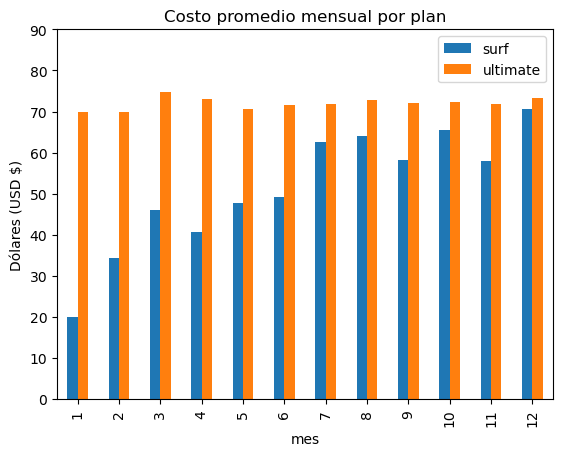

In [59]:
# Creamos gráfico de barras comparando el promedio de costo total al mes de usuarios entre planes

pivot_income_per_month = income_per_month.pivot_table(index = 'month',                   # Usamos el mes como índice
                                                      columns = 'plan',                  # Las columnas serán los planes (surf y ultimate)
                                                      values = 'monthly_cost',            # Los valores de la tabla serán los costos mensuales de cada usuario
                                                      aggfunc = 'mean')                  # Nos interesa el promedio del costo de los usuarios de cada plan    

pivot_income_per_month.plot(kind = 'bar',                                                # Creamos un gráfico de barras
                            title = 'Costo promedio mensual por plan', 
                            ylabel = 'Dólares (USD $)', 
                            xlabel = 'mes', 
                            ylim = [0,90])

plt.legend(['surf','ultimate'])

plt.show()

Al igual como en los casos anteriores, se consideró ideal comparar los costos promedio mensuales de cada plan. Observamos que todos los meses, el promedio del plan 'Ultimate' es mayor a 'Surf'. 

Hay que considerar que el costo de partida entre planes difiere por 50 dólares, por lo que se puede inferir que los usuarios prefieren contrarar 'Surf' a un precio menor y gran parte de ellos no tienen problema pagando extra por un servicio más completo, pero sin llegar a los 70 dólares de 'Ultimate' haciendo que los promedios difieran entre planes. Habría que comparar promedios y varianzas para probar nuestra hipótesis

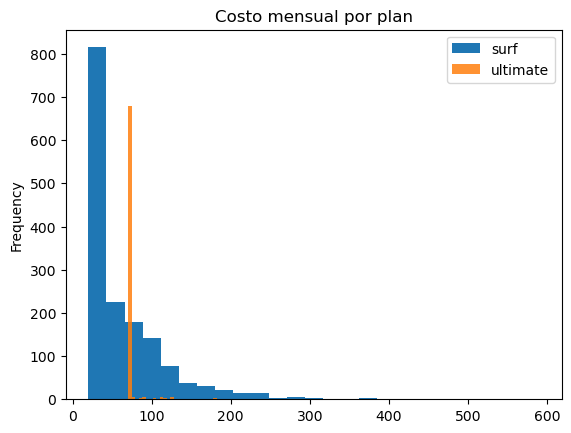

In [60]:
# Compara el costo mensual que pagan los usuario por el plan. Traza un histograma.

surf_income_per_month = income_per_month[income_per_month['plan'] == 'surf']                 # Creamos variable que guarde solo los valores del plan 'surf'
ultimate_income_per_month = income_per_month[income_per_month['plan'] == 'ultimate']         # Creamos variable que guarde solo los valores del plan 'ultimate'

surf_income_per_month['monthly_cost'].plot(kind = 'hist',                                    # Creamos el histograma
                                           bins = 25, 
                                           title = 'Costo mensual por plan',
                                           xlabel = 'Dólares (USD $)',
                                           ylabel = 'Frecuencia')
ultimate_income_per_month['monthly_cost'].plot(kind = 'hist',
                                               bins = 25, 
                                               alpha = 0.85)

plt.legend(['surf','ultimate'])
plt.show()

La diferencia de frecuencia entre 'Surf' y 'Ultimate' está relacionada al número de usuarios. El histograma deja ver que el pico de 'Surf' está en los 20 USD mientras que el de 'Ultimate' en 70 USD, siendo ambos los precios base. Por el gráfico, se puede inferir que el plan que más ingresos genera a Megaline es 'Surf'. 

In [61]:
# Calculamos la media y varianza de los costos totales por plan 

mean_surf_income_per_month = surf_income_per_month['monthly_cost'].mean()         # Obtenemos el promedio del costo para usuarios 'Surf'
var_surf_income_per_month = np.var(surf_income_per_month['monthly_cost'])         # Obtenemos la varianza de los datos de usuarios 'Surf'

mean_ultimate_income_per_month = ultimate_income_per_month['monthly_cost'].mean() # Obtenemos el promedio del costo para usuarios 'Ultimate'
var_ultimate_income_per_month = np.var(ultimate_income_per_month['monthly_cost']) # Obtenemos la varianza de los datos de usuarios 'Ultimate'

print(f'La media del costo para usuarios "Surf" es: {mean_surf_income_per_month:.3f}')
print(f'La varianza del costo para usuarios "Surf" es: {var_surf_income_per_month:.3f}')
print()
print(f'La media del costo para usuarios "Ultimate" es: {mean_ultimate_income_per_month:.3f}')
print(f'La varianza del costo para usuarios "Ultimate" es: {var_ultimate_income_per_month:.3f}')

La media del costo para usuarios "Surf" es: 60.706
La varianza del costo para usuarios "Surf" es: 3065.885

La media del costo para usuarios "Ultimate" es: 72.314
La varianza del costo para usuarios "Ultimate" es: 129.668


Text(0, 0.5, 'Dólares (USD $)')

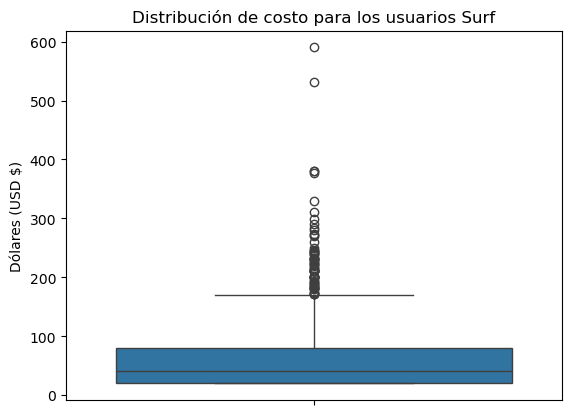

In [62]:
# Traza un diagrama de caja para visualizar la distribución del costo del plan Surf

sns.boxplot(surf_income_per_month['monthly_cost'])
plt.title('Distribución de costo para los usuarios Surf')
plt.ylabel('Dólares (USD $)')

Text(0, 0.5, 'Dólares (USD $)')

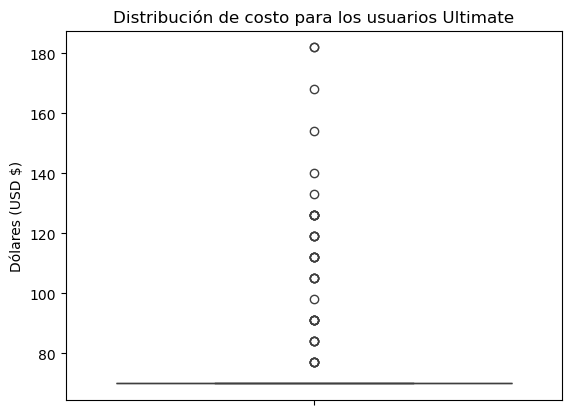

In [63]:
# Traza un diagrama de caja para visualizar la distribución del costo del plan Ultimate

sns.boxplot(ultimate_income_per_month['monthly_cost'])
plt.title('Distribución de costo para los usuarios Ultimate')
plt.ylabel('Dólares (USD $)')

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

A pesar de que la media entre ambos planes solo es diferente por 10 dólares, la varianza dice mucho más en este caso. La varianza del costo para usuarios "Surf" es 3065.88 dólares, mientras que para usuarios "Ultimate" es: 129.668. una varianza más pequeña supone menor desviación estándar generando una menor variación de la media. 

Lo vemos con el gráfico de cajas de 'Ultimate' donde prácticamente no se logra apreciar la "caja", cuartiles, mediana y valores mínimos y máximos, lo que nos podría indicar que todos estos valores deben ser diferentes por muy poco. Esto se puede confirmar con el valor atípico de 80, el cual no difiere mucho de la media; no obstante, aparece cómo un valor fuera del rango estimado de datos. Podemos concluir que los ingresos del plan 'Ultimate' están casi relacionados al costo fijo mensual del plan. 

Para el gráfico de 'Surf' está mejor definida la "caja", cuartiles y límites. Al tener una varianza mucho más grande, nos indica una mayor dispersión de los datos, esta afirmación se sustenta en el límite del eje "y" donde los valores pueden llegar hasta los 600 dólares.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**Hipótesis nula** -> El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es igual. 

**Hipótesis alternativa** -> El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.

*Se plantea una hipótesis de dos colas, ya que esta hipótesis está formulada para evaluar si la media de la muestra es considerablemente mayor o menor que la media de una población. El valor de alfa será de 0.05*

In [64]:
# Prueba las hipótesis

data = surf_income_per_month['monthly_cost']

interested_value = mean_ultimate_income_per_month 

alpha = .05 # la significancia estadística crítica (umbral)

# realizar una prueba
results = st.ttest_1samp(data, interested_value)

# imprimir el valor p resultante
print('valor p: ', results.pvalue)

# comparar el valor p con el umbral
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  2.0160297778788502e-16
Rechazamos la hipótesis nula


Al probar la hipótesis por el método de dos colas, el valor p es menor al de alfa, por lo que concluimos que **se rechaza la hipótesis nula**. 

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**Hipótesis nula** -> El ingreso promedio de los usuarios del área de Nueva York y Nueva Jersey es igual al de usuarios de otras regiones del país. 

**Hipótesis alternativa** -> El ingreso promedio de los usuarios del área de Nueva York y Nueva Jersey difiere al de usuarios de otras regiones del país. 

*Se plantea una hipótesis de dos colas, ya que esta hipótesis está formulada para evaluar si la media de la muestra es considerablemente mayor o menor que la media de una población. El valor de alfa será de 0.05*

In [65]:
# Prueba las hipótesis

users_state = df_users[['state', 'user_id']]             # Obtenemos las columnas de estado y user_id de nuestro dataframe df_users

df_merged = df_merged.merge(users_state, on = 'user_id') # lo anexamos a nuestro dataframe existente utilizando merge

print(df_merged)
#print(users_state)

      user_id  month  minutes_used  sms_used   mb_used      plan  \
0        1000     12         124.0      11.0   1901.47  ultimate   
1        1001      8         182.0      30.0   6919.15      surf   
2        1001      9         315.0      44.0  13314.82      surf   
3        1001     10         393.0      53.0  22330.49      surf   
4        1001     11         426.0      36.0  18504.30      surf   
...       ...    ...           ...       ...       ...       ...   
2288     1498     12         339.0       NaN  23137.69      surf   
2289     1499      9         346.0       NaN  12984.76      surf   
2290     1499     10         385.0       NaN  19492.43      surf   
2291     1499     11         308.0       NaN  16813.83      surf   
2292     1499     12         496.0       NaN  22059.21      surf   

      monthly_cost         state  
0            70.00        GA MSA  
1            20.00        WA MSA  
2            20.00        WA MSA  
3            90.09        WA MSA  
4       

In [66]:
# Separamos los usuarios de NY-NJ-PA del resto

ny_nj_pa_users = df_merged[df_merged['state'] == 'NY-NJ-PA MSA']  # Filtra los estados que coinciden con 'NY-NJ-PA MSA'
rest_users = df_merged[df_merged['state'] != 'NY-NJ-PA MSA']      # Filtra los estados que no son 'NY-NJ-PA MSA'

In [67]:
# Prueba las hipótesis

ny_nj_pa_income = ny_nj_pa_users['monthly_cost']

interested_value = rest_users['monthly_cost'].mean() 

alpha = .05 # la significancia estadística crítica (umbral)

# realizar una prueba
results = st.ttest_1samp(ny_nj_pa_income, interested_value)

# imprimir el valor p resultante
print('valor p: ', results.pvalue)

# comparar el valor p con el umbral
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.018573531142999183
Rechazamos la hipótesis nula


Al probar la hipótesis por el método de dos colas, el valor p es menor al de alfa, por lo que concluimos que **se rechaza la hipótesis nula**. 

## Conclusión general


[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


Para este proyecto se limpiaron los datos transformando las fechas a formato 'datetime', buscando valores nulos y duplicados y creando una columna que mostrara el mes en el que el usuario utilizó los servicios (llamadas, sms o megabytes). 

Una vez limpios, se juntaron todos los datos en un solo dataframe llamado **df_merge** que nos sirvió para trabajar la mayor parte del proeycto. En este dataframe incluimos los detalles de user_id, el mes de facturación, llamadas, sms, megabytes utilizados, el plan del usuario, costo mensual y el estado (región) del usuario. Al hacer uso de .merge() se utilizaron los párametros *outer* y *left* para asegurarnos que los datos se incluyeron correctamente. 

Del dataframe df_merged, se crearon otros dataframes que nos sirvieron para conocer la media y varianza por llamadas, mensajes, internet y costos mensuales. Con estos nuevos dataframes fuimos capaces de crear gráficas que describieron el comportamiento de las medias y varianzas entre planes. 

Finalmente, probamos nuestra hipótesis inicial del proyecto que planteaba que *El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es igual.*. Utilizamos un método de **hipótesis de dos colas** ya que pretendiamos evaluar si la media de la muestra era considerablemente mayor o menor que la media de una población. Se utilizó un valor alfa de 0.05 ya que es una medida común de significación estadística. Al terminar, concluimos que el *valor p* era menor al de significación estadística; por lo tanto, tenemos elementos para **rechazar** la hipótesis nula.

Se realizó un ejercicio adicional donde se planteó que *el ingreso promedio de los usuarios del área de Nueva York y Nueva Jersey es igual al de usuarios de otras regiones del país.*. Creando nuevos dataframes derivados de *df_merged* y siguiendo los mismos pasos del procedimiento anterior, concluimos que el *valor p* era menor al de la significación; por lo que tenemos elementos para **rechazar** la hipótesis nula.